## 4. Modeling
### 4.3 Model after PCA

Based on the previos analysis (notebook 4.2), 5 models were selected with the highest AUROC scores:

1. AdaBoosting Classifier with KFold validation
2. Random Forest with KFold validation
3. Logistic Regression with KFold validation
4. Gradient Boost with KFold validation
5. AdaBoosting Classifier 

The selected models will be checked with PCA analysis.

In [63]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
#importing the PCA scaling library
from sklearn.decomposition import PCA
#importing the feature scaling library
from sklearn.preprocessing import StandardScaler
#Import Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split
# Import Linear Regression, Ridge and Lasso machine learning library
from sklearn.linear_model import LogisticRegression
# Import KNN Regressor machine learning library
from sklearn.tree import DecisionTreeClassifier
# Import ensemble machine learning library
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor)
# Import support vector regressor machine learning library
from sklearn.svm import SVC
#Import the metrics
from sklearn import metrics
#Import the Voting regressor for Ensemble
from sklearn.ensemble import VotingRegressor
# Import stats from scipy
from scipy import stats
# Import zscore for scaling
from scipy.stats import zscore
#importing the metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
#importing the K fold
from sklearn.model_selection import KFold
#importing the cross validation score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
#importing the preprocessing library
from sklearn import preprocessing
# importing the Polynomial features
from sklearn.preprocessing import PolynomialFeatures
from sklearn.utils import resample
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


In [2]:
# Uploading data file
loan_main_dummies = pd.read_csv('./loan_main_dummies.csv')
loan_main_dummies.head()

,loan_amnt,funded_amnt,term,installment,grade,sub_grade,emp_length,annual_inc,issue_d,dti,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,5000.0,5000.0,36,162.87,1,6,10,24000.0,2011,27.65,...,0,0,0,0,0,0,0,0,0,0
1,2500.0,2500.0,60,59.83,2,13,0,30000.0,2011,1.00,...,0,0,0,0,0,0,0,0,0,0
2,2400.0,2400.0,36,84.33,2,14,10,12252.0,2011,8.72,...,0,0,0,0,0,0,0,1,0,0
3,10000.0,10000.0,36,339.31,2,10,10,49200.0,2011,20.00,...,0,0,0,0,0,1,0,0,0,0
4,3000.0,3000.0,60,67.79,1,9,1,80000.0,2011,17.94,...,0,0,0,0,0,1,0,0,0,0


In [3]:
loan_main_dummies.head()

,loan_amnt,funded_amnt,term,installment,grade,sub_grade,emp_length,annual_inc,issue_d,dti,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,5000.0,5000.0,36,162.87,1,6,10,24000.0,2011,27.65,...,0,0,0,0,0,0,0,0,0,0
1,2500.0,2500.0,60,59.83,2,13,0,30000.0,2011,1.00,...,0,0,0,0,0,0,0,0,0,0
2,2400.0,2400.0,36,84.33,2,14,10,12252.0,2011,8.72,...,0,0,0,0,0,0,0,1,0,0
3,10000.0,10000.0,36,339.31,2,10,10,49200.0,2011,20.00,...,0,0,0,0,0,1,0,0,0,0
4,3000.0,3000.0,60,67.79,1,9,1,80000.0,2011,17.94,...,0,0,0,0,0,1,0,0,0,0


In [4]:
# Define dataset
X = loan_main_dummies.drop('loan_status', axis =1)
y = loan_main_dummies.loan_status

In [5]:
# Skaling features
scaler = StandardScaler()
scaler.fit_transform(X)
X_scaled = scaler.transform(X)
scaled_data = pd.DataFrame(X_scaled, columns= X.columns)

In [6]:
scaled_data.shape

(42535, 52)

In [7]:
scaled_data.head()

,loan_amnt,funded_amnt,term,installment,grade,sub_grade,emp_length,annual_inc,issue_d,dti,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,-0.821731,-0.814569,-0.590645,-0.764644,-0.466389,-0.622967,1.442745,-1.412142,0.795288,2.122578,...,-0.285175,-0.100581,-0.239694,-0.134246,-0.122514,-0.340751,-0.049983,-0.22166,-0.097434,-0.155482
1,-1.159074,-1.164374,1.693064,-1.257836,0.228822,0.366964,-1.328770,-1.170964,0.795288,-1.839520,...,-0.285175,-0.100581,-0.239694,-0.134246,-0.122514,-0.340751,-0.049983,-0.22166,-0.097434,-0.155482
2,-1.172567,-1.178366,-0.590645,-1.140569,0.228822,0.508382,1.442745,-1.884367,0.795288,-0.691775,...,-0.285175,-0.100581,-0.239694,-0.134246,-0.122514,-0.340751,-0.049983,4.51142,-0.097434,-0.155482
3,-0.147044,-0.114958,-0.590645,0.079871,0.228822,-0.057292,1.442745,-0.399197,0.795288,0.985240,...,-0.285175,-0.100581,-0.239694,-0.134246,-0.122514,2.934694,-0.049983,-0.22166,-0.097434,-0.155482
4,-1.091605,-1.094413,1.693064,-1.219736,-0.466389,-0.198711,-1.051618,0.838846,0.795288,0.678977,...,-0.285175,-0.100581,-0.239694,-0.134246,-0.122514,2.934694,-0.049983,-0.22166,-0.097434,-0.155482


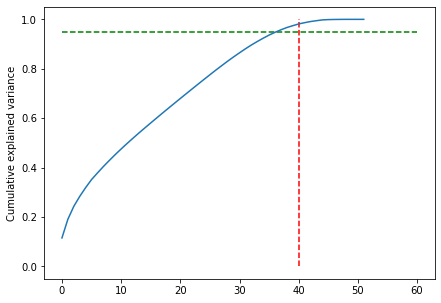

In [9]:
# PCA graph
pca = PCA().fit(X_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.vlines(x=40, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=60, xmin=0, colors="g", linestyles="--")
plt.ylabel('Cumulative explained variance')
plt.gcf().set_size_inches(7, 5)

In [10]:
from sklearn.decomposition import IncrementalPCA

pca = IncrementalPCA(n_components = 40)
colnames = list(scaled_data.columns)
loan_main_dummies_pca = pca.fit_transform(X_scaled)
loan_main_dummies_pca_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1]})
loan_main_dummies_pca_df.head()

,PC1,PC2
0,0.370981,0.018863
1,0.369763,0.021014
2,0.165460,0.093744
3,0.346406,0.033180
4,0.123031,0.426796


In [12]:
print(X.shape)
print(loan_main_dummies_pca.shape)

(42535, 52)
(42535, 40)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(loan_main_dummies_pca, y, test_size=0.3, random_state=0)

#### Ada Boosting Classifier KFold PCA

In [14]:
model_AB_pca = AdaBoostClassifier(random_state=1)
model_AB_pca.fit(X_train, y_train)
model_AB_pca.score(X_test,y_test)

0.8465637489224982

In [15]:
num_folds = 10
kfold = KFold(n_splits=num_folds, shuffle=True, random_state = 77)
resultsAB_pca = cross_val_score(model_AB_pca,X, y, cv=kfold)
acc_KF_AB_pca = np.mean(abs(resultsAB_pca))
AUROC_KF_AB_pca = np.mean(abs(cross_val_score(model_AB_pca, X, y, scoring='roc_auc', cv=10)))

In [16]:
results = pd.DataFrame({'Model':['AdaBoost Classifier KFold PCA'], 'Accuracy': acc_KF_AB_pca, 'AUROC': AUROC_KF_AB_pca},index={'1'})
results = results[['Model', 'Accuracy', 'AUROC']]
results

,Model,Accuracy,AUROC
1,AdaBoost Classifier KFold PCA,0.881086,0.903117


#### Random Forest KFold PCA

In [18]:
model_RF_pca = RandomForestClassifier(n_estimators=100)
model_RF_pca.fit(X_train, y_train)
model_RF_pca.score(X_test, y_test)

0.851187211033618

In [19]:
num_folds = 10
kfold = KFold(n_splits=num_folds, shuffle=True, random_state = 77)
resultsRF_pca = cross_val_score(model_RF_pca,X, y, cv=kfold)
acc_KF_RF_pca = np.mean(abs(resultsRF_pca))
AUROC_KF_RF_pca = np.mean(abs(cross_val_score(model_RF_pca, X, y, scoring='roc_auc', cv=10)))

In [20]:
tempResultsDf = pd.DataFrame({'Model':['RandomForest KFold PCA'], 'Accuracy': [acc_KF_RF_pca],  'AUROC': AUROC_KF_RF_pca}, index={'2'})
results = pd.concat([results, tempResultsDf])
results = results[['Model', 'Accuracy', 'AUROC']]
results

,Model,Accuracy,AUROC
1,AdaBoost Classifier KFold PCA,0.881086,0.903117
2,RandomForest KFold PCA,0.882708,0.901003


#### Logistic Regression KFold PCA

In [21]:
model_LR_pca = LogisticRegression(max_iter=10000)
model_LR_pca.fit(X_train, y_train)
model_LR_pca.score(X_test,y_test)

0.8553404905571663

In [22]:
num_folds = 10
kfold = KFold(n_splits=num_folds, shuffle=True, random_state = 77)
resultsLR_pca = cross_val_score(model_LR_pca,X, y, cv=kfold)
acc_KF_LR_pca=np.mean(abs(resultsLR_pca))
AUROC_KF_LR_pca = np.mean(abs(cross_val_score(model_LR_pca, X, y, scoring='roc_auc', cv=10)))

In [23]:
tempResultsDf  = pd.DataFrame({'Model':['Logistic Regression KFold PCA'], 'Accuracy': [acc_KF_LR_pca], 'AUROC': AUROC_KF_LR_pca},index={'3'})
results = pd.concat([results, tempResultsDf ])
results = results[['Model', 'Accuracy', 'AUROC']]
results

,Model,Accuracy,AUROC
1,AdaBoost Classifier KFold PCA,0.881086,0.903117
2,RandomForest KFold PCA,0.882708,0.901003
3,Logistic Regression KFold PCA,0.857576,0.856344


#### Gradient Boost Classifier KFold PCA

In [24]:
model_GB_pca= GradientBoostingClassifier(learning_rate=0.01, random_state=1)
model_GB_pca.fit(X_train, y_train)
model_GB_pca.score(X_test,y_test)

0.847739205391427

In [25]:
num_folds = 10
kfold = KFold(n_splits=num_folds, shuffle=True, random_state = 77)
resultsGB_pca = cross_val_score(model_GB_pca,X, y, cv=kfold)
acc_KF_GB_pca =np.mean(abs(resultsGB_pca))
AUROC_KF_GB_pca = np.mean(abs(cross_val_score(model_GB_pca, X, y, scoring='roc_auc', cv=10)))

In [26]:
tempResultsDf = pd.DataFrame({'Model':['Gradient Boosting KFold PCA'], 'Accuracy': [acc_KF_GB_pca], 'AUROC': AUROC_KF_GB_pca}, index={'4'})
results = pd.concat([results, tempResultsDf])
results = results[['Model', 'Accuracy', 'AUROC']]
results

,Model,Accuracy,AUROC
1,AdaBoost Classifier KFold PCA,0.881086,0.903117
2,RandomForest KFold PCA,0.882708,0.901003
3,Logistic Regression KFold PCA,0.857576,0.856344
4,Gradient Boosting KFold PCA,0.849747,0.850584


#### Ada Boosting Classifier PCA

In [45]:
model_AB_pca = AdaBoostClassifier(random_state=1)
model_AB_pca.fit(X_train, y_train)
model_AB_pca.score(X_test,y_test)

0.8465637489224982

In [65]:
prediction_AB = model_AB_pca.predict(X_test)
print('Performance on training data using AdaBoosting Classifier after PCA:',model_AB_pca.score(X_train,y_train))
print('Performance on testing data using AdaBoosting after PCA:',model_AB_pca.score(X_test,y_test))
acc_AB = accuracy_score(y_test, prediction_AB)
recall_AB = recall_score(y_test, prediction_AB)
precision_AB = precision_score(y_test, prediction_AB)
f1_AB = f1_score(y_test, prediction_AB)
AUROC_AB = roc_auc_score(y_test, prediction_AB)

Performance on training data using AdaBoosting Classifier after PCA: 0.8588701551689394
Performance on testing data using AdaBoosting after PCA: 0.8465637489224982


In [66]:
confusion_matrix(y_test, prediction_AB)

array([[  339,  1639],
       [  319, 10464]])

In [68]:
tempResultsDf= pd.DataFrame({'Model':['AdaBoost Classifier PCA'], 'Accuracy': [acc_AB], 'AUROC': AUROC_AB}, index={'5'})
results = pd.concat([results, tempResultsDf])
results = results[['Model', 'Accuracy', 'AUROC']]
results

,Model,Accuracy,AUROC
1,AdaBoost Classifier KFold PCA,0.881086,0.903117
2,RandomForest KFold PCA,0.882708,0.901003
3,Logistic Regression KFold PCA,0.857576,0.856344
4,Gradient Boosting KFold PCA,0.849747,0.850584
5,AdaBoost Classifier PCA,0.846564,0.570901
5,AdaBoost Classifier PCA,0.846564,0.570901


In [70]:
results_pca = results

In [71]:
results_pca.sort_values('AUROC')

,Model,Accuracy,AUROC
5,AdaBoost Classifier PCA,0.846564,0.570901
5,AdaBoost Classifier PCA,0.846564,0.570901
4,Gradient Boosting KFold PCA,0.849747,0.850584
3,Logistic Regression KFold PCA,0.857576,0.856344
2,RandomForest KFold PCA,0.882708,0.901003
1,AdaBoost Classifier KFold PCA,0.881086,0.903117


- After implementing PCA the highest AUROC is obtained for Ada Boost Classifier after KFold (AUROC = 0.903).
- Second strongest model is Random Forest after KFold.
- Logistic Regression after KFold was the third best model, then GradientBoost after KFold.
- The weakest performance was observed for AdaBoost Classifier.

#### Model comparison (before and after PCA)

After PCA implementation:

1. AdaBoost KFold no improvement on accuracy and AUROC.
2. Random Forest KFold slighlty improved on AUROC (from AUC=0.89 to 0.90).
3. Logistic Regression KFold no improvement on accuracy and AUROC.
4. Gradient Boosting KFold no improvement on accuracy and AUROC.
5. AdaBoost Classifier achieved lower AUROC score.

Based on this, Random Forest KFold model was selected for final analysis.